# Classification of Three Types of Cervical Images
This data comes from the Intel & MobileODT Cervical Cancer Screening challenge. The data set contains cervical images labeled as one of three types based on the anatomy. Types 2 and 3 may require additional screening to determine if a cervical pathology is present. Healthcare providers often have diffculty determining the type of cervix during an examination, and thus an algorithm-aided decision could improve quality of cervical cancer screenings for patients and efficiency for practitoners.

<img src="Slide3.jpg">

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import seaborn as sns
from skimage.io import imread, imshow
import cv2
from PIL import Image
from subprocess import check_output
from subprocess import call
from bokeh.charts import Bar, output_file, show
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.palettes import Spectral6
from bokeh.layouts import widgetbox
from bokeh.models.widgets import RadioGroup
from bokeh.charts.attributes import cat
from bokeh.models.widgets import Panel, Tabs
from ipywidgets import *
import requests
import ujson as json
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
#import plotly 
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls 
#plotly.tools.set_credentials_file(username='DemoAccount', api_key='lr1c37zw81')

In [5]:
data = pd.read_csv('all_cervix_images', sep = ',')

In [6]:
data.head()

,Unnamed: 0,imagepath,filetype,type,image,size
0,0,testdata/train/Type_1/0.jpg,jpg,Type_1,1,3264 x 2448
1,1,testdata/train/Type_1/0010.jpg,jpg,Type_1,1,4128 x 3096
2,2,testdata/train/Type_1/001000.jpg,jpg,Type_1,1,3264 x 2448
3,3,testdata/train/Type_1/001001.jpg,jpg,Type_1,1,4128 x 3096
4,4,testdata/train/Type_1/001003.jpg,jpg,Type_1,1,4128 x 3096


In [7]:
type_aggregation = data.groupby(['type', 'filetype']).agg('count')

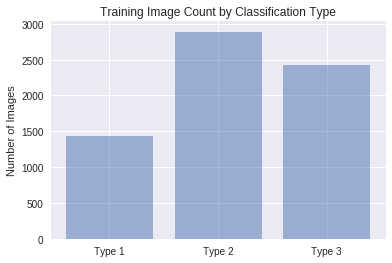

In [7]:
types = ('Type 1', 'Type 2', 'Type 3')
y_pos = np.arange(len(types))
images = [1441, 2890, 2426]
 
plt.bar(y_pos, images, align='center', alpha=0.5)
plt.xticks(y_pos, types)
plt.ylabel('Number of Images')
plt.title('Training Image Count by Classification Type')
 
plt.show()

In [12]:
sorted_imagesdf = data.sort("size")

/opt/conda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



In [13]:
output_notebook()  # output bokeh plots in ipynb
TOOLS = "pan, box_zoom, wheel_zoom, reset, save"

Loading BokehJS ...

In [15]:
from bokeh.models.widgets import Panel, Tabs
from bokeh.io import output_file, show
from bokeh.plotting import figure

p1 = Bar(sorted_imagesdf, values= 'image', label= 'type',stack='size', agg= 'sum', title="Image Size by Type")
tab1 = Panel(child=p1, title="stacked")

p2 = Bar(data, label='type', values= 'image', agg='sum', group='size', title="Image Size by Type")
tab2 = Panel(child=p2, title="unstacked")

tabs = Tabs(tabs=[ tab1, tab2 ])

show(tabs)

In [8]:
data.head()

,Unnamed: 0,imagepath,filetype,type,image,size
0,0,testdata/train/Type_1/0.jpg,jpg,Type_1,1,3264 x 2448
1,1,testdata/train/Type_1/0010.jpg,jpg,Type_1,1,4128 x 3096
2,2,testdata/train/Type_1/001000.jpg,jpg,Type_1,1,3264 x 2448
3,3,testdata/train/Type_1/001001.jpg,jpg,Type_1,1,4128 x 3096
4,4,testdata/train/Type_1/001003.jpg,jpg,Type_1,1,4128 x 3096


In [ ]:
from numpy import loadtxt

In [28]:
tsne = np.loadtxt('tsne')

In [27]:
tsne_key = np.loadtxt('tsne_key')

In [29]:
from sklearn import preprocessing

trace1 = go.Scatter3d(
    x=tsne[:,0],
    y=tsne[:,1],
    z=tsne[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = preprocessing.LabelEncoder().fit_transform(tsne_key),
        colorscale = 'Viridis',
        colorbar = dict(title = 'cervix types'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.9
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3D embedding of images')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

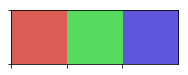

In [46]:
pal = sns.color_palette("hls", 3)
sns.palplot(pal)

/opt/conda/lib/python2.7/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning:

The axisbg attribute was deprecated in version 2.0. Use facecolor instead.



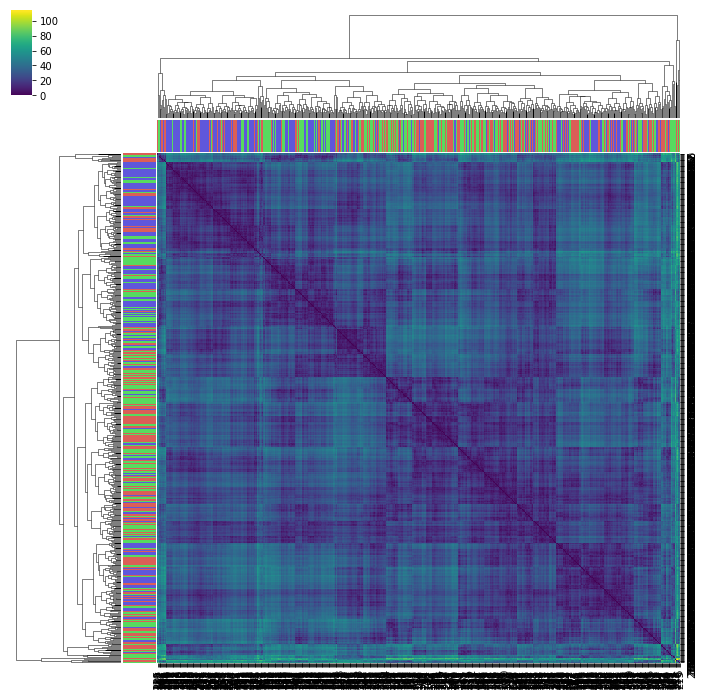

In [49]:
from scipy.spatial.distance import pdist, squareform

sq_dists = squareform(pdist(tsne))

all_image_types = list(tsne_key)

d = {
     1: pal[0],
     2: pal[1],
     3: pal[2]
}

# translate each sample to its color
colors = list(map(lambda t: d[t], tsne_key))

sns.clustermap(
    sq_dists,
    figsize=(12,12),
    row_colors=colors, col_colors=colors,
    cmap=plt.get_cmap('viridis'))


# Running a CNN using Keras and TensorFlow

<img src="Slide1.jpg">